In [1]:
import os

import pandas as pd
import numpy as np
from icecream import ic
from tqdm import tqdm

from event_triggered_response import *

import seaborn as sns
sns.set_theme(style="darkgrid")
sns.set_palette('colorblind')

In [2]:
multiscope_experiment_table = pd.read_csv('multiscope_experiment_table_filtered.csv', index_col='ophys_experiment_id').reset_index().drop(columns = ['Unnamed: 0'])
multiscope_experiment_table.head()

,ophys_experiment_id,ophys_session_id,ophys_container_id,mouse_id,cre_line,session_type,imaging_depth,experience_level
0,951980473,951410079,1018028345,457841,Sst-IRES-Cre,OPHYS_1_images_A,225,Familiar
1,953659743,952430817,1018028345,457841,Sst-IRES-Cre,OPHYS_2_images_A_passive,225,Familiar
2,958527471,954954402,1018028345,457841,Sst-IRES-Cre,OPHYS_3_images_A,225,Familiar
3,956941844,955775716,1018028345,457841,Sst-IRES-Cre,OPHYS_3_images_A,225,Familiar
4,957759564,957020350,1018028345,457841,Sst-IRES-Cre,OPHYS_4_images_B,225,Novel 1


In [3]:
all_cell_etr_files = os.listdir('cell_etr_data')

In [4]:
all_experiments = []
all_cells = []

for filename in all_cell_etr_files:
    split = filename.replace('.csv', '').split('_')
    all_experiments.append(int(split[0]))
    all_cells.append(int(split[1]))

all_experiments = list(set(all_experiments))

print(len(all_experiments))
print(len(all_cells))

25
125


In [5]:
multiscope_experiment_table = multiscope_experiment_table[multiscope_experiment_table['ophys_experiment_id'].isin(all_experiments)]
multiscope_experiment_table.shape

(25, 8)

In [6]:
multiscope_experiment_table[multiscope_experiment_table['ophys_experiment_id'] == 1082434498]

,ophys_experiment_id,ophys_session_id,ophys_container_id,mouse_id,cre_line,session_type,imaging_depth,experience_level
33,1082434498,1082262218,1079027842,546605,Sst-IRES-Cre,OPHYS_5_images_B_passive,232,Novel >1


In [7]:
one_experiment = [x for x in all_cell_etr_files if str(x).find('1082434498') == 0]

In [8]:
one_experiment_etr = []
for x in one_experiment:
    one_etr = pd.read_csv(f'cell_etr_data/{x}').drop(columns = ['Unnamed: 0'])
    one_experiment_etr.append(one_etr)
one_experiment_etr = pd.concat(one_experiment_etr)

In [9]:
one_experiment_etr

,cell_specimen_id,ophys_experiment_id,time,dff,event_number,original_index,event_time
0,1120091374,1082434498,-3.00,0.011257,0,4802,309.46589
1,1120091374,1082434498,-2.98,0.011257,0,4802,309.46589
2,1120091374,1082434498,-2.96,0.011257,0,4802,309.46589
3,1120091374,1082434498,-2.94,0.007643,0,4802,309.46589
4,1120091374,1082434498,-2.92,-0.017455,0,4802,309.46589
...,...,...,...,...,...,...,...
1387003,1120091758,1082434498,2.92,0.060873,4607,9597,3909.30668
1387004,1120091758,1082434498,2.94,0.063525,4607,9597,3909.30668
1387005,1120091758,1082434498,2.96,0.066178,4607,9597,3909.30668
1387006,1120091758,1082434498,2.98,0.068693,4607,9597,3909.30668


In [12]:
to_plot = one_experiment_etr.groupby(['ophys_experiment_id', 'cell_specimen_id', 'time'])['dff'].mean().reset_index()

<AxesSubplot:xlabel='time', ylabel='dff'>

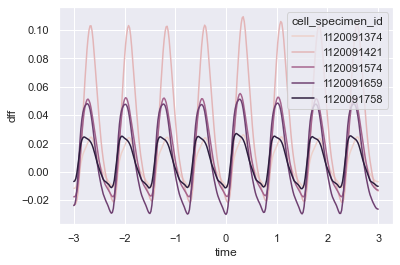

In [13]:
sns.lineplot(data=to_plot,
             x='time',
             y='dff',
             hue = 'cell_specimen_id',
             n_boot=500)

In [14]:
multiscope_experiment_table[multiscope_experiment_table['cre_line'] == 'Vip-IRES-Cre']

,ophys_experiment_id,ophys_session_id,ophys_container_id,mouse_id,cre_line,session_type,imaging_depth,experience_level
16,939471248,938898514,1018028396,453989,Vip-IRES-Cre,OPHYS_2_images_A_passive,225,Familiar
18,944115808,940775208,1018028396,453989,Vip-IRES-Cre,OPHYS_3_images_A,225,Familiar
20,948704862,948252173,1018028396,453989,Vip-IRES-Cre,OPHYS_6_images_B,225,Novel >1
65,849233390,848983781,1018027853,438912,Vip-IRES-Cre,OPHYS_4_images_B,225,Novel 1
70,881949070,881094781,1018028374,435431,Vip-IRES-Cre,OPHYS_2_images_A_passive,274,Familiar
76,885146237,884451806,1018028370,435431,Vip-IRES-Cre,OPHYS_4_images_B,223,Novel >1
83,891108758,889944877,1018028370,435431,Vip-IRES-Cre,OPHYS_5_images_B_passive,217,Novel >1
85,942596355,941676716,1022731531,453991,Vip-IRES-Cre,OPHYS_1_images_A,225,Familiar
86,945586431,944888114,1022731531,453991,Vip-IRES-Cre,OPHYS_3_images_A,225,Familiar
88,948689198,948042811,1022731531,453991,Vip-IRES-Cre,OPHYS_4_images_B,225,Novel 1


In [20]:
one_experiment = [x for x in all_cell_etr_files if str(x).find('948689198') == 0]

In [21]:
one_experiment_etr = []
for x in one_experiment:
    one_etr = pd.read_csv(f'cell_etr_data/{x}').drop(columns = ['Unnamed: 0'])
    one_experiment_etr.append(one_etr)
one_experiment_etr = pd.concat(one_experiment_etr)

In [22]:
to_plot = one_experiment_etr.groupby(['ophys_experiment_id', 'cell_specimen_id', 'time'])['dff'].mean().reset_index()

<AxesSubplot:xlabel='time', ylabel='dff'>

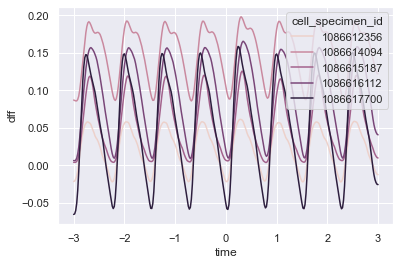

In [23]:
sns.lineplot(data=to_plot,
             x='time',
             y='dff',
             hue = 'cell_specimen_id',
             n_boot=500)

In [24]:
to_plot

,ophys_experiment_id,cell_specimen_id,time,dff
0,948689198,1086612356,-3.00,-0.021633
1,948689198,1086612356,-2.98,-0.020952
2,948689198,1086612356,-2.96,-0.018555
3,948689198,1086612356,-2.94,-0.014149
4,948689198,1086612356,-2.92,-0.006734
...,...,...,...,...
1500,948689198,1086617700,2.92,-0.012735
1501,948689198,1086617700,2.94,-0.019089
1502,948689198,1086617700,2.96,-0.023054
1503,948689198,1086617700,2.98,-0.025313
